In [1]:
#First import important python library which we are going to use for data analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


In [2]:
#To load dataset estonia-passenger-list.csv
df=pd.read_csv('estonia-passenger-list.csv')


In [3]:
#to show first 5 records
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
#to show last 5 records
df.tail()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [5]:
#to show random 5  records
df.sample(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
786,787,Estonia,HEINO,SIKK,M,61,P,0
658,659,Sweden,INGRID ANITA,PERSSON FLYGARE,F,38,P,1
562,563,Lithuania,VYTATAS,MILIAUSKAS,M,44,P,0
954,955,Sweden,EIVOR MARGARETA,WANSTROM,F,57,P,0
405,406,Estonia,VELLO,KORNEL,M,60,P,0


In [6]:
#To see number of rows and column
df.shape

(989, 8)

In [7]:
#To give information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [8]:
#To give all staticstical information about dataset
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [9]:
#To see all columns in dataset
df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [10]:
#make the list of unwanted column
X=['PassengerId', 'Firstname','Lastname']
#to remove the unwanted columns X from given dataset df permannently
df.drop(X,axis=1,inplace=True)

In [11]:
df.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


In [12]:
#To check null values  in each column
df.isnull().sum()

Country     0
Sex         0
Age         0
Category    0
Survived    0
dtype: int64

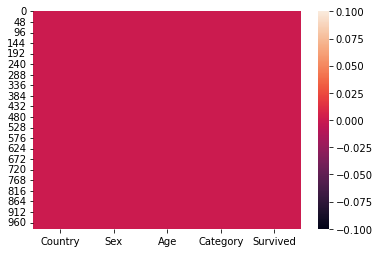

In [13]:
#to checknull value in givens dataset in visualise form
sb.heatmap(df.isnull())
plt.show()

In [14]:
#to check the datatype of columns
df.dtypes

Country     object
Sex         object
Age          int64
Category    object
Survived     int64
dtype: object

In [15]:
#to check duplicates rows 
df.duplicated().sum()

560

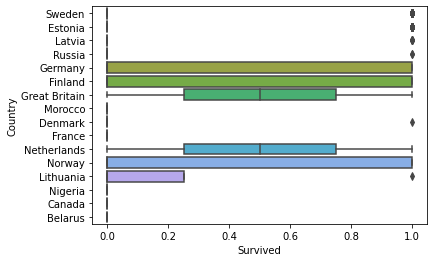

In [16]:
#to check outlier of country people which survived
sb.boxplot(data=df,x='Survived',y='Country')
plt.show()

In [17]:
#library in python for  data preprocessing 
#We use label encoder to convert object to numeric value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Sex']=le.fit_transform(df['Sex'])
df['Category']=le.fit_transform(df['Category'])

In [18]:
df.dtypes

Country     int32
Sex         int32
Age         int64
Category    int32
Survived    int64
dtype: object

Index(['Country', 'Sex', 'Age', 'Category', 'Survived'], dtype='object')
Column Name : Country and skewness : -0.39711126671824626


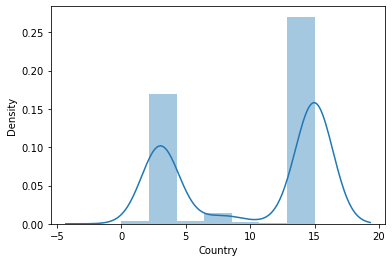

Column Name : Sex and skewness : -0.03443548940380053


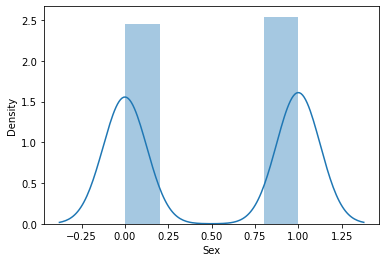

Column Name : Age and skewness : 0.06792986904254292


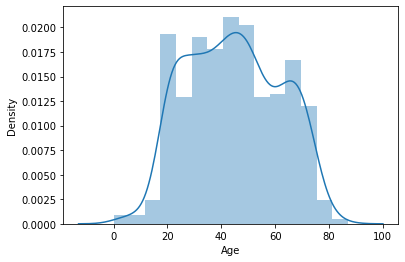

Column Name : Category and skewness : -1.5407833941831774


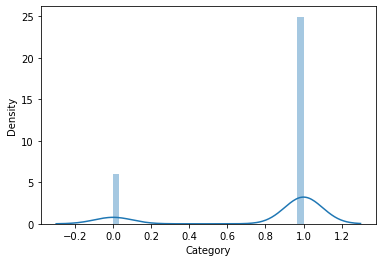

Column Name : Survived and skewness : 2.0959717569220824


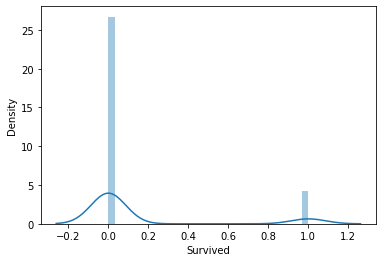

In [19]:
columns=df.columns
print(columns)
for col in columns:
    s=df[col].skew()
    print("Column Name : {} and skewness : {}".format(col,s))
    sb.distplot(df[col])
    plt.show()

In [20]:
#To see the valuecount of passengers survived
df.Survived.value_counts()

0    852
1    137
Name: Survived, dtype: int64

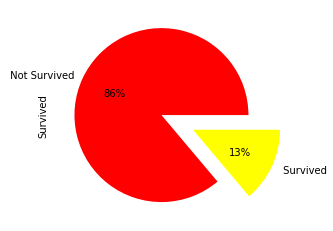

In [21]:
#How many people survived
labels=[' Not Survived',' Survived']
df['Survived'].value_counts().plot(kind='pie',colors=['red','yellow'],autopct='%d%%',explode=(0,0.4),labels=labels)
plt.show()

In [22]:
df.Sex.value_counts()

1    503
0    486
Name: Sex, dtype: int64

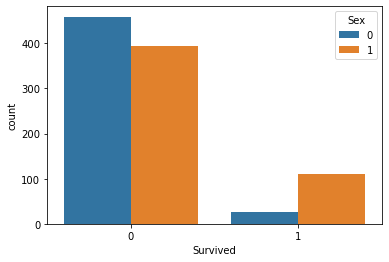

In [23]:
#Gender which survived 
sb.countplot(data=df,x='Survived',hue='Sex')
plt.show()

In [24]:
df.Category.value_counts()

1    796
0    193
Name: Category, dtype: int64

In [25]:
df.groupby('Category')['Survived'].value_counts()


Category  Survived
0         0           154
          1            39
1         0           698
          1            98
Name: Survived, dtype: int64

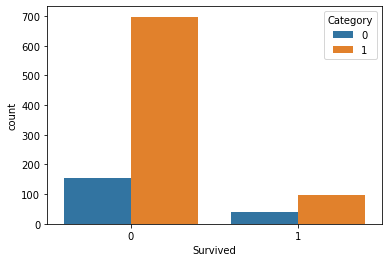

In [26]:
#Category which survived 
sb.countplot(data=df,x='Survived',hue='Category')
plt.show()

In [27]:
df.Age.value_counts()

21    27
45    27
30    25
67    25
50    24
      ..
9      1
15     1
0      1
2      1
87     1
Name: Age, Length: 78, dtype: int64

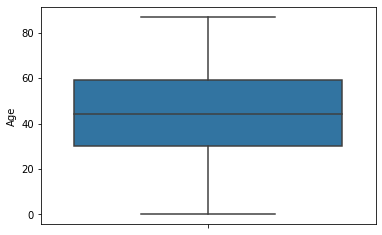

In [28]:
#To show most passengers age
sb.boxplot(data =df,y ='Age')
plt.show()

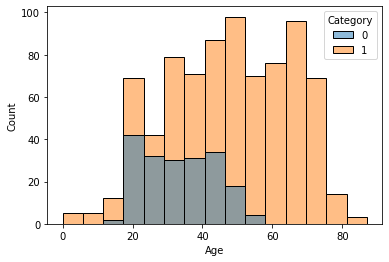

In [29]:
#Age with category 
sb.histplot(data=df,x='Age',hue='Category')
plt.show()

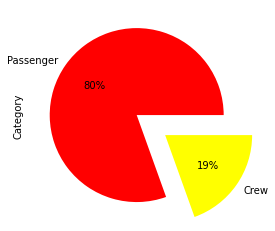

In [30]:
labels = ['Passenger','Crew']
df['Category'].value_counts().plot(kind='pie',colors=['red','yellow'],autopct='%d%%',explode=(0,0.4),labels=labels)
plt.show()

In [31]:
#find the correlation between 2 variables
#df.corr()

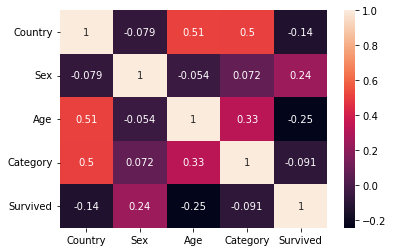

In [32]:
#visualize
sb.heatmap(df.corr(),annot=True) 
plt.show()

In [33]:
#Standard Scaler 
from sklearn .preprocessing import StandardScaler
ss=StandardScaler()
df=ss.fit_transform(df)
df


array([[ 0.84584011,  0.98295615,  1.01150798,  0.49240462, -0.40099641],
       [-1.25337161, -1.01733938, -1.31050535, -2.03085015, -0.40099641],
       [-1.25337161, -1.01733938, -1.36855569, -2.03085015, -0.40099641],
       ...,
       [ 0.84584011,  0.98295615,  1.88226299,  0.49240462, -0.40099641],
       [ 0.84584011, -1.01733938,  2.46276632,  0.49240462, -0.40099641],
       [ 0.84584011,  0.98295615, -0.14949868,  0.49240462,  2.4937879 ]])